In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/court-data/judges_clean/judges_clean.csv
/kaggle/input/court-data/acts_sections/acts_sections.csv
/kaggle/input/court-data/cases/cases/cases_2015.csv
/kaggle/input/court-data/cases/cases/cases_2012.csv
/kaggle/input/court-data/cases/cases/cases_2018.csv
/kaggle/input/court-data/cases/cases/cases_2013.csv
/kaggle/input/court-data/cases/cases/cases_2017.csv
/kaggle/input/court-data/cases/cases/cases_2010.csv
/kaggle/input/court-data/cases/cases/cases_2014.csv
/kaggle/input/court-data/cases/cases/cases_2016.csv
/kaggle/input/court-data/cases/cases/cases_2011.csv
/kaggle/input/court-data/keys/keys/type_name_key.csv
/kaggle/input/court-data/keys/keys/cases_district_key.csv
/kaggle/input/court-data/keys/keys/act_key.csv
/kaggle/input/court-data/keys/keys/disp_name_key.csv
/kaggle/input/court-data/keys/keys/purpose_name_key.csv
/kaggle/input/court-data/keys/keys/cases_state_key.csv
/kaggle/input/court-data/keys/keys/section_key.csv
/kaggle/input/court-data/keys/keys/cases_court_

### *Reading 'cases_last_5yrs.csv' into a dataFrame*
##### *'cases_last_5yrs.csv' is a .csv file created in another notebook*

In [2]:
last_5yrs_cases = pd.read_csv("/kaggle/input/last-5yrs-cases-merged/cases_last_5yrs.csv")
last_5yrs_cases

,Unnamed: 0,ddl_case_id,year,state_code,judge_position,disp_name,date_of_filing,date_of_decision
0,0,01-01-01-201908000022014,2014,1,chief judicial magistrate,25,2014-01-03,2014-10-28
1,1,01-01-01-201908000032014,2014,1,chief judicial magistrate,25,2014-01-01,2015-08-10
2,2,01-01-01-201908000052014,2014,1,chief judicial magistrate,25,2014-01-02,2014-06-10
3,3,01-01-01-201908000062014,2014,1,chief judicial magistrate,22,2014-01-04,2016-11-14
4,4,01-01-01-201908000072014,2014,1,chief judicial magistrate,25,2014-01-04,2014-01-04
...,...,...,...,...,...,...,...,...
57489559,57489559,33-02-03-224600000062018,2018,33,chief judicial magistrate,25,2018-07-26,2018-09-12
57489560,57489560,33-02-03-224600000072018,2018,33,chief judicial magistrate,25,2018-08-25,2019-03-23
57489561,57489561,33-02-03-224600000082018,2018,33,chief judicial magistrate,25,2018-09-06,2019-03-28
57489562,57489562,33-02-03-224600000092018,2018,33,chief judicial magistrate,25,2018-09-14,2019-09-21


*dropping unwanted columns*

In [3]:
last_5yrs_cases.drop(columns=['Unnamed: 0','judge_position', 'date_of_filing','date_of_decision'], inplace=True)
last_5yrs_cases

,ddl_case_id,year,state_code,disp_name
0,01-01-01-201908000022014,2014,1,25
1,01-01-01-201908000032014,2014,1,25
2,01-01-01-201908000052014,2014,1,25
3,01-01-01-201908000062014,2014,1,22
4,01-01-01-201908000072014,2014,1,25
...,...,...,...,...
57489559,33-02-03-224600000062018,2018,33,25
57489560,33-02-03-224600000072018,2018,33,25
57489561,33-02-03-224600000082018,2018,33,25
57489562,33-02-03-224600000092018,2018,33,25


### *Reading 'disp_name_key.csv' into a dataFrame*

In [4]:
disp_key = pd.read_csv("/kaggle/input/court-data/keys/keys/disp_name_key.csv")
disp_key = disp_key.sort_values(by='disp_name', ascending=True, ignore_index=True)
disp_key.head(50)

,year,disp_name,disp_name_s,count
0,2010,1,258 crpc,15765
1,2014,1,258 crpc,47556
2,2016,1,258 crpc,44490
3,2013,1,258 crpc,40371
4,2017,1,258 crpc,37385
5,2012,1,258 crpc,27825
6,2018,1,258 crpc,14443
7,2011,1,258 crpc,20940
8,2015,1,258 crpc,65237
9,2018,2,abated,15656


*dropping unwanted columns and removing duplicates to merge with the other dataFrame*

In [5]:
disp_key.drop(columns=['year', 'count'], inplace=True)
disp_key.head(50)

,disp_name,disp_name_s
0,1,258 crpc
1,1,258 crpc
2,1,258 crpc
3,1,258 crpc
4,1,258 crpc
5,1,258 crpc
6,1,258 crpc
7,1,258 crpc
8,1,258 crpc
9,2,abated


In [6]:
disp_key.drop_duplicates(subset='disp_name_s', inplace=True, ignore_index=True)
disp_key

,disp_name,disp_name_s
0,1,258 crpc
1,2,abated
2,3,absconded
3,4,acquitted
4,5,allowed
5,6,appeal accepted
6,7,award
7,8,bail granted
8,9,bail order
9,9,bail refused


In [7]:
last_5yrs_cases = pd.merge(last_5yrs_cases, disp_key, how='left', on='disp_name')
last_5yrs_cases.drop(columns=['disp_name'], inplace=True)
last_5yrs_cases

,ddl_case_id,year,state_code,disp_name_s
0,01-01-01-201908000022014,2014,1,disposed-otherwise
1,01-01-01-201908000032014,2014,1,disposed-otherwise
2,01-01-01-201908000052014,2014,1,disposed-otherwise
3,01-01-01-201908000062014,2014,1,dismissed
4,01-01-01-201908000072014,2014,1,disposed-otherwise
...,...,...,...,...
57489827,33-02-03-224600000062018,2018,33,disposed-otherwise
57489828,33-02-03-224600000072018,2018,33,disposed-otherwise
57489829,33-02-03-224600000082018,2018,33,disposed-otherwise
57489830,33-02-03-224600000092018,2018,33,disposed-otherwise


In [8]:
import warnings
warnings.simplefilter('ignore')
import gc
import subprocess
del disp_key
gc.collect()

70

In [9]:
from matplotlib import ticker

## *Number of cases for each disposition type sorted in descending order*

### *2018*

In [10]:
df1 = last_5yrs_cases.query('year == 2018').pivot_table(columns='year', index='disp_name_s', values='ddl_case_id', aggfunc='count')
df1 = df1.sort_values(by=2018, ascending=False)
df1

year,2018
disp_name_s,
ex-parte,6338472
allowed,1104047
disposed-otherwise,778906
judgement,590995
reject,571902
disposal in lok adalat,441631
decided,416122
uncontested,394249
plead guilty,339551


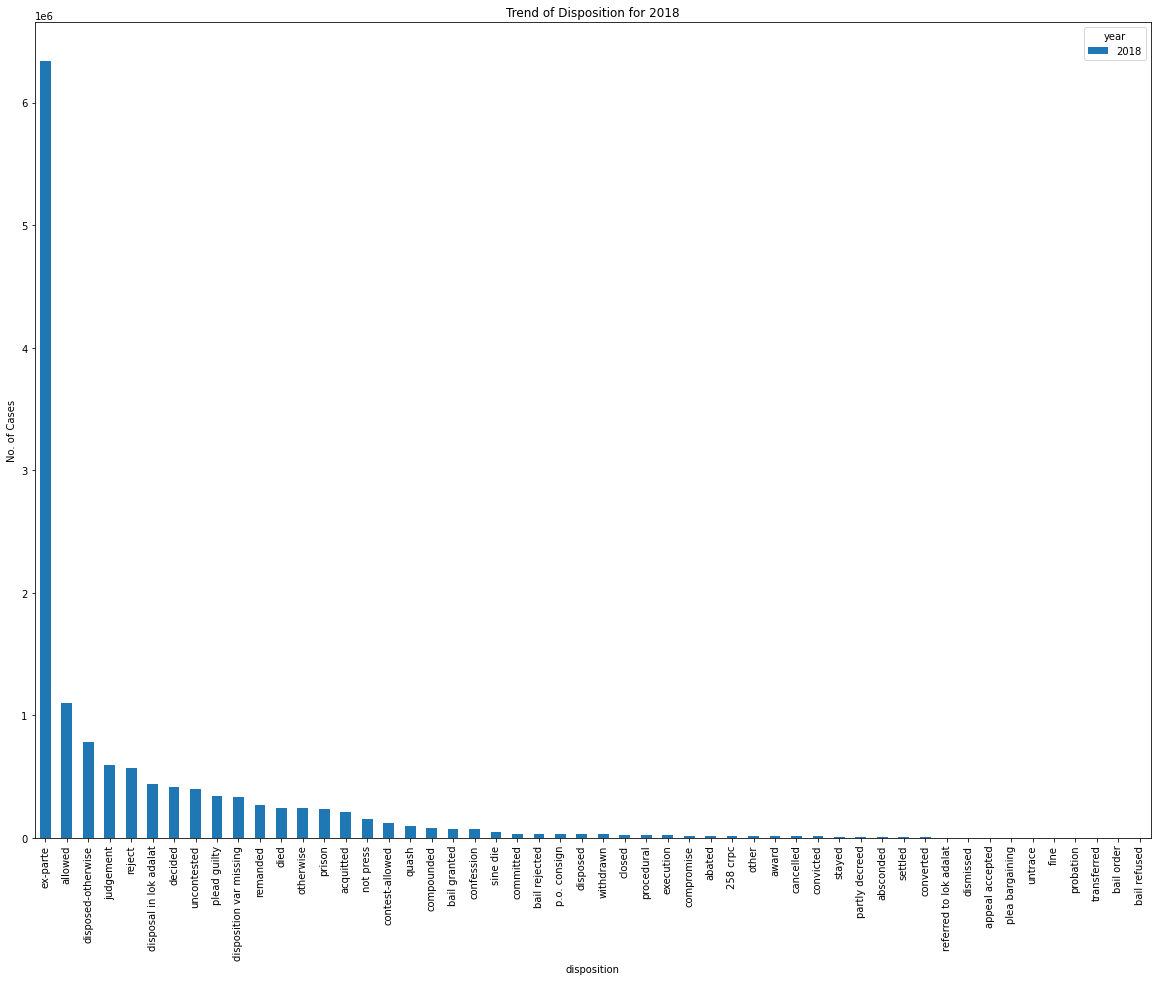

In [11]:
plot = df1.plot(kind='bar', figsize=(20,15), title='Trend of Disposition for 2018', ylabel='No. of Cases', xlabel='disposition')
fig = plot.get_figure()
fig.savefig("/kaggle/working/trend_of_disposition_for_2018.jpg")

### *2017*

In [12]:
df2 = last_5yrs_cases.query('year == 2017').pivot_table(columns='year', index='disp_name_s', values='ddl_case_id', aggfunc='count')
df2 = df2.sort_values(by=2017, ascending=False)
df2

year,2017
disp_name_s,
ex-parte,4521012
allowed,1101941
disposed-otherwise,892083
judgement,763001
reject,720854
disposal in lok adalat,706392
decided,474365
uncontested,457022
acquitted,371770


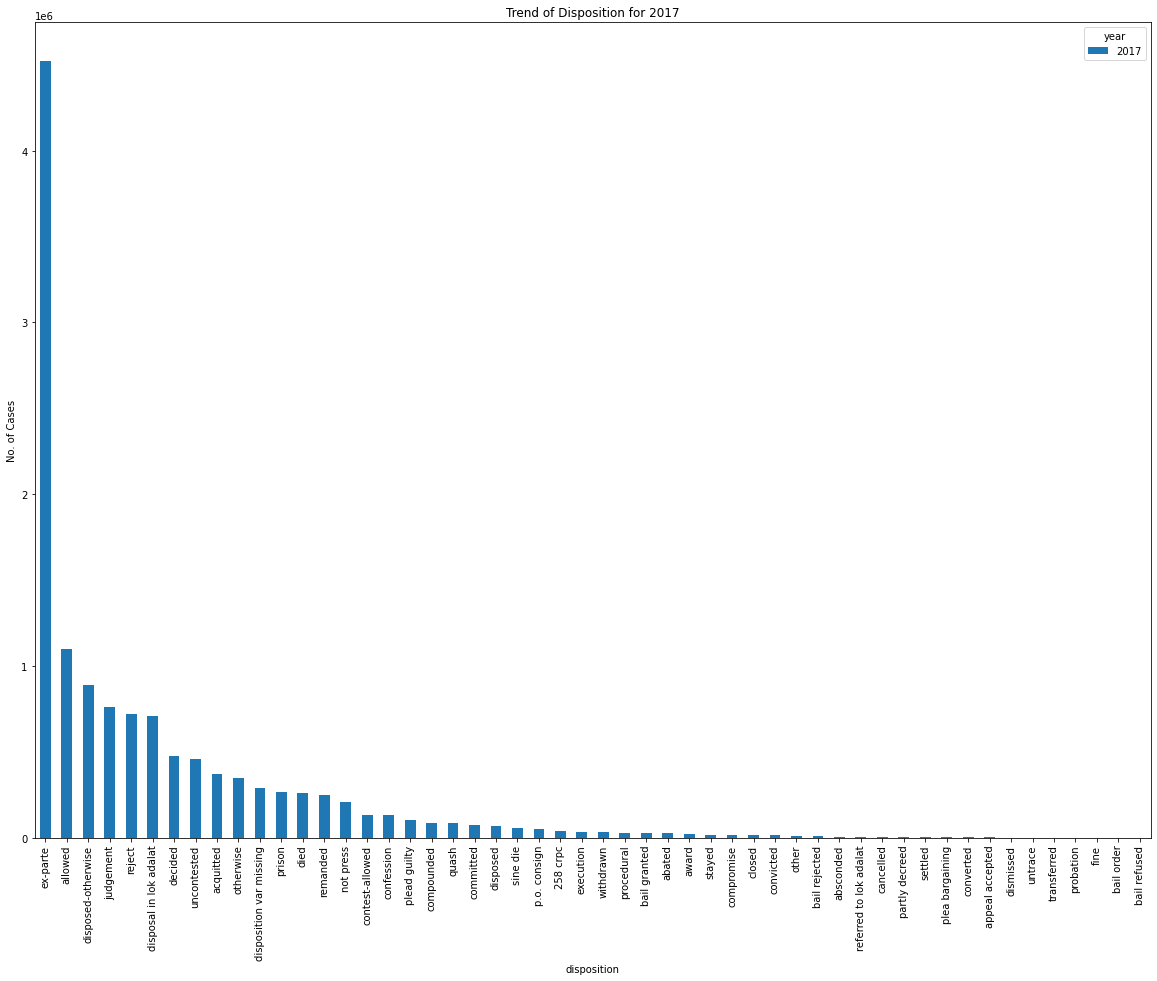

In [13]:
plot = df2.plot(kind='bar', figsize=(20,15), title='Trend of Disposition for 2017', ylabel='No. of Cases', xlabel='disposition')
fig = plot.get_figure()
fig.savefig("/kaggle/working/trend_of_disposition_for_2017.jpg")

### *2016*

In [14]:
df3 = last_5yrs_cases.query('year == 2016').pivot_table(columns='year', index='disp_name_s', values='ddl_case_id', aggfunc='count')
df3 = df3.sort_values(by=2016, ascending=False)
df3

year,2016
disp_name_s,
ex-parte,3260488
allowed,938736
disposal in lok adalat,820324
disposed-otherwise,711040
judgement,558296
reject,557311
uncontested,518583
acquitted,471271
decided,432004


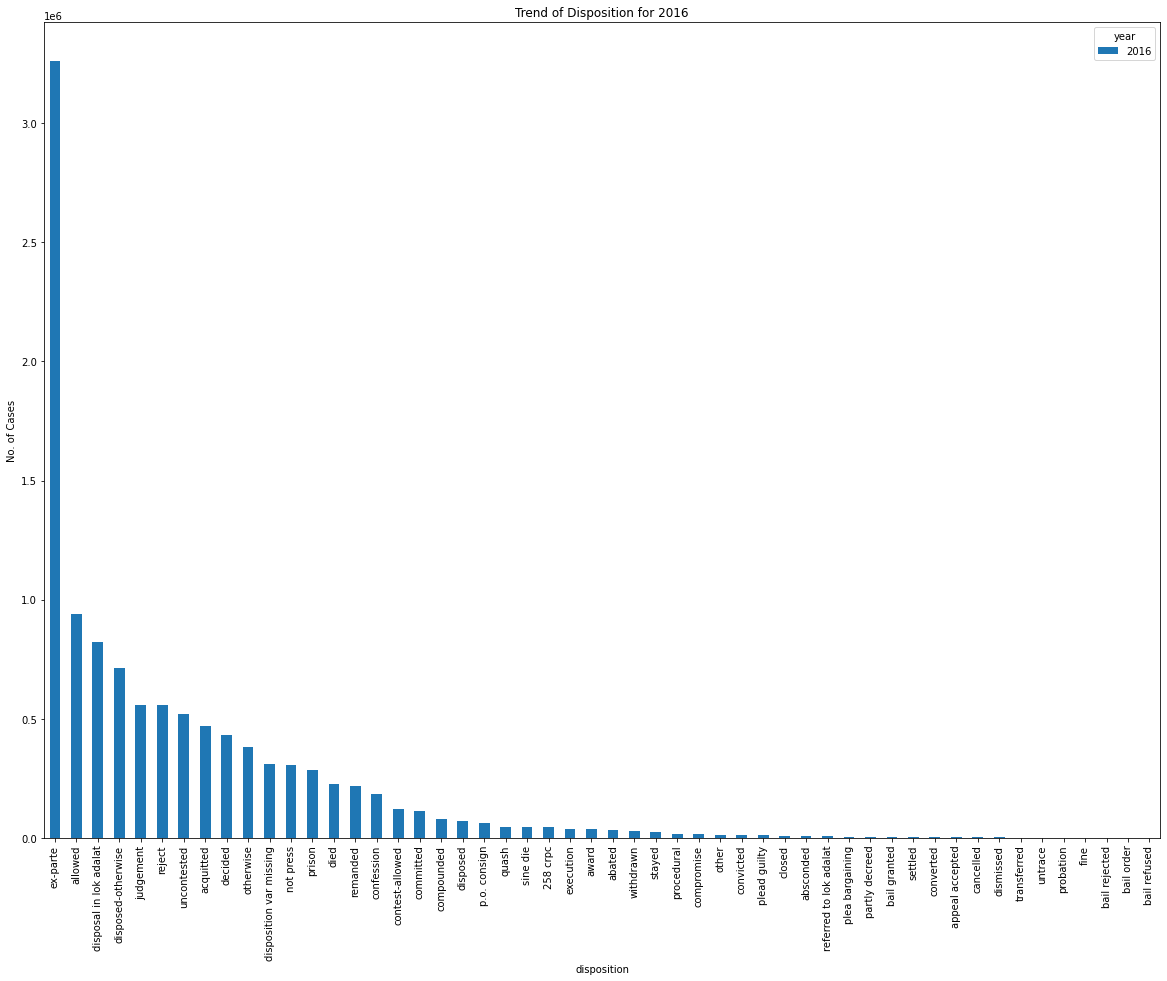

In [15]:
plot = df3.plot(kind='bar', figsize=(20,15), title='Trend of Disposition for 2016', ylabel='No. of Cases', xlabel='disposition')
fig = plot.get_figure()
fig.savefig("/kaggle/working/trend_of_disposition_for_2016.jpg")

### *2015*

In [16]:
df4 = last_5yrs_cases.query('year == 2015').pivot_table(columns='year', index='disp_name_s', values='ddl_case_id', aggfunc='count')
df4 = df4.sort_values(by=2015, ascending=False)
df4

year,2015
disp_name_s,
disposition var missing,2259042
dismissed,961444
allowed,881581
disposed,698398
transferred,580169
acquitted,562171
referred to lok adalat,459290
convicted,455331
other,422885


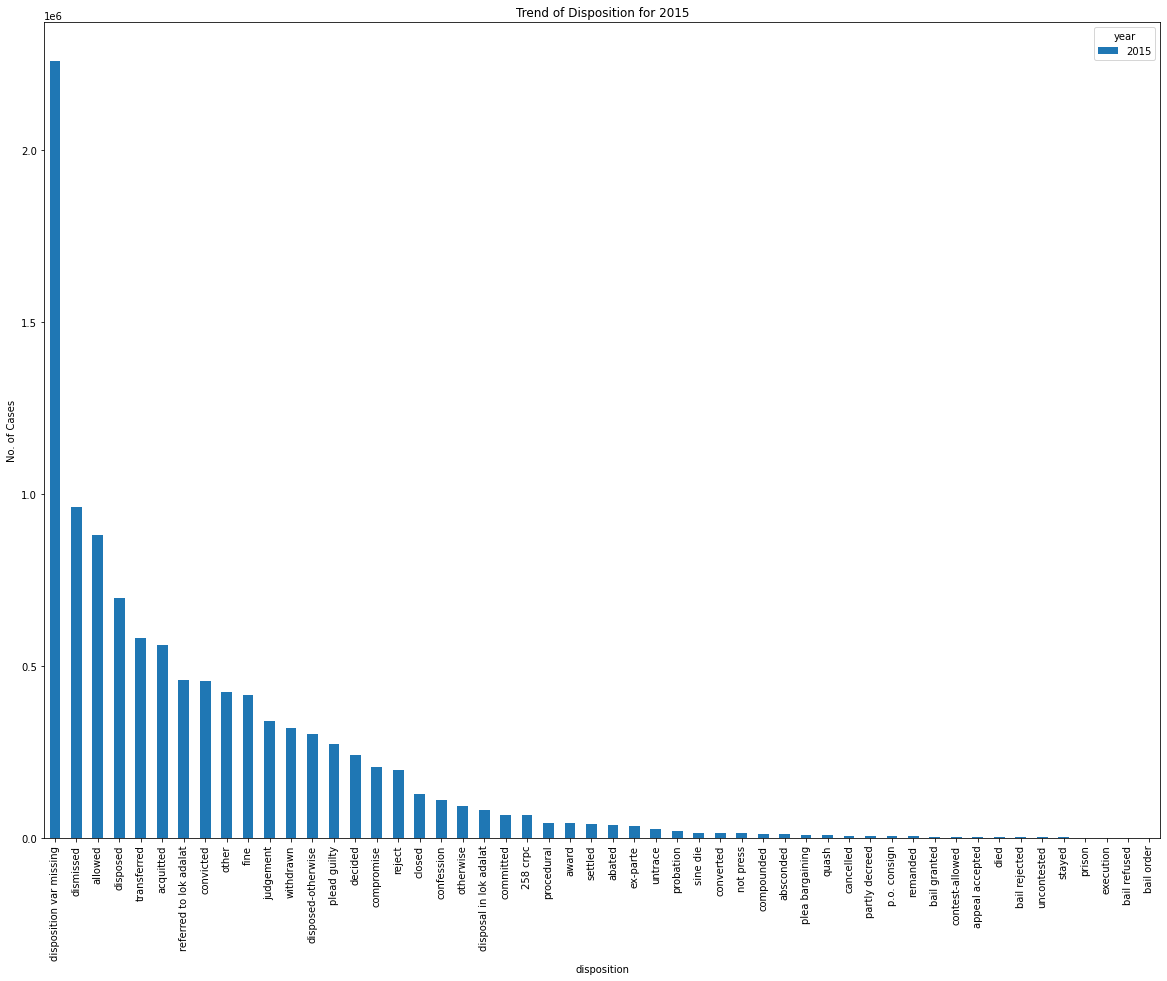

In [17]:
plot = df4.plot(kind='bar', figsize=(20,15), title='Trend of Disposition for 2015', ylabel='No. of Cases', xlabel='disposition')
fig = plot.get_figure()
fig.savefig("/kaggle/working/trend_of_disposition_for_2015.jpg")

### *2014*

In [18]:
df5 = last_5yrs_cases.query('year == 2014').pivot_table(columns='year', index='disp_name_s', values='ddl_case_id', aggfunc='count')
df5 = df5.sort_values(by=2014, ascending=False)
df5

year,2014
disp_name_s,
disposition var missing,1607071
dismissed,957554
allowed,767580
disposed,596847
acquitted,584050
transferred,461920
other,417764
convicted,397669
judgement,386075


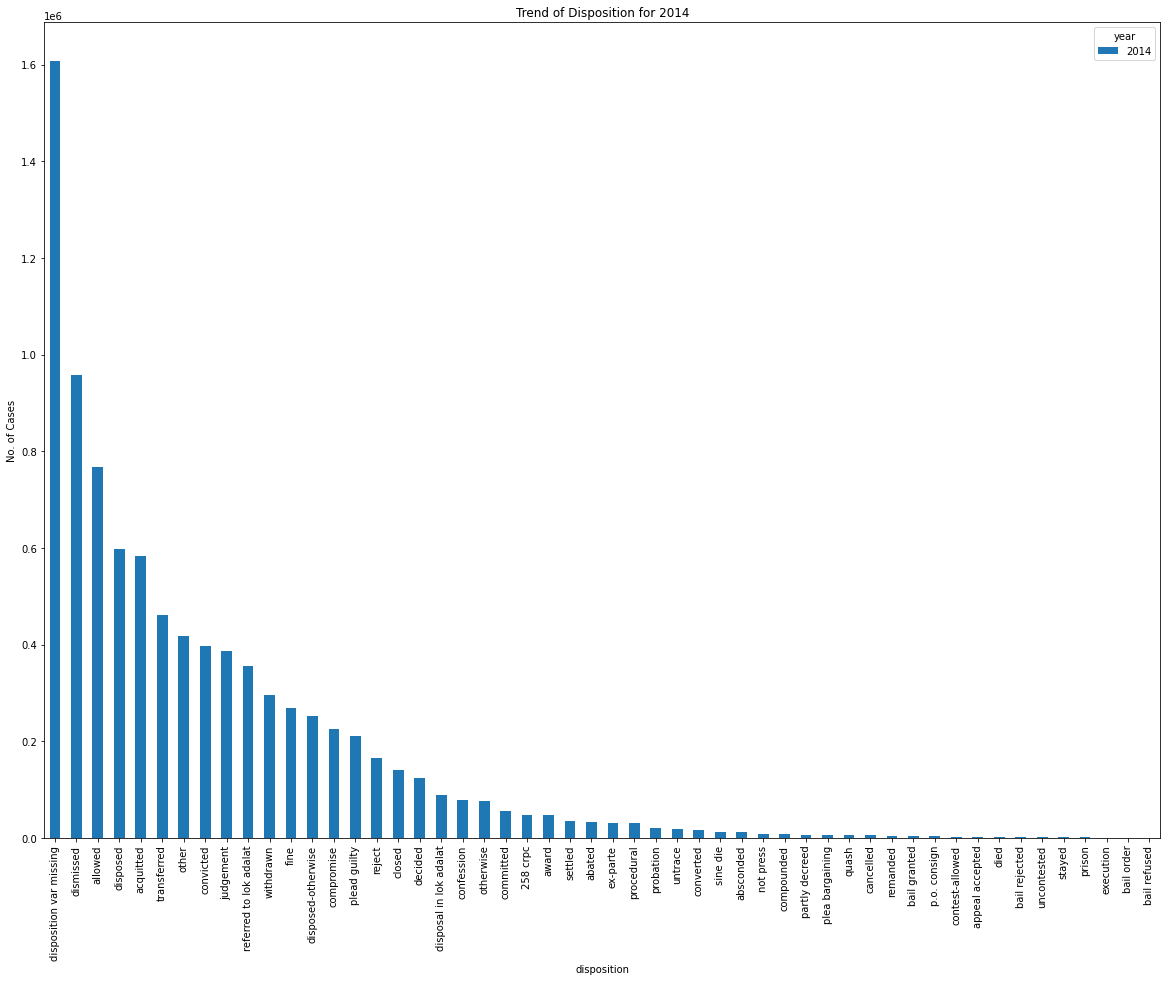

In [19]:
plot = df5.plot(kind='bar', figsize=(20,15), title='Trend of Disposition for 2014', ylabel='No. of Cases', xlabel='disposition')
fig = plot.get_figure()
fig.savefig("/kaggle/working/trend_of_disposition_for_2014.jpg")

## *Trend of nuber of cases for some dispositions over the last 5 years*

In [20]:
df6 = last_5yrs_cases.query("disp_name_s in ('acquitted', 'compromise', 'confession', 'convicted', 'execution', 'withdrawn')").pivot_table(index='year', columns='disp_name_s', values='ddl_case_id', aggfunc='count')
df6

disp_name_s,acquitted,compromise,confession,convicted,execution,withdrawn
year,,,,,,
2014,584050,224978,78039,397669,246,294791
2015,562171,205710,111226,455331,350,319350
2016,471271,16692,185068,13019,35926,28989
2017,371770,17994,133014,13753,36278,34043
2018,207801,15973,73679,10942,19242,29986


## *Stacked bar graph showing the number of cases for some dispositions*

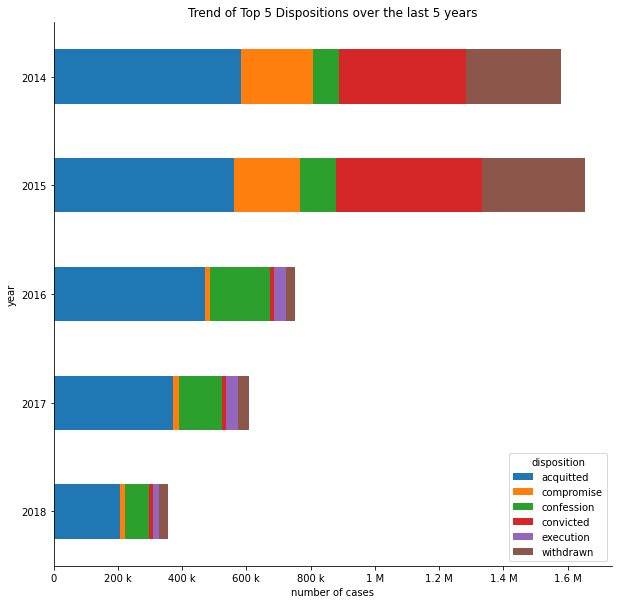

In [21]:
from matplotlib import ticker
graph = df6.plot(kind='barh', figsize=(10,10), stacked=True, title='Trend of Top 5 Dispositions over the last 5 years')

#put year 2014 on top
graph.invert_yaxis()

#formatting
graph.set(xlabel='number of cases', ylabel='year')
graph.legend(title='disposition')

# shows x-axis in thousands and millions instead of scientific notation
graph.xaxis.set_major_formatter(ticker.EngFormatter())

# removes the top and right lines from the figure to make it less boxy
for spine in ['top', 'right']:
    graph.spines[spine].set_visible(False)

fig = graph.get_figure()
fig.savefig("/kaggle/working/trend_of_top_5_disp.jpg")

In [22]:
del last_5yrs_cases
gc.collect()

37713

In [23]:
del df1
gc.collect()

del df2
gc.collect()

del df3
gc.collect()

del df4
gc.collect()

del df5
gc.collect()

0

In [24]:
last_5yrs_cases = pd.read_csv("/kaggle/input/last-5yrs-cases-merged/cases_last_5yrs.csv")
last_5yrs_cases.drop(columns=['Unnamed: 0','judge_position'], inplace=True)
last_5yrs_cases

,ddl_case_id,year,state_code,disp_name,date_of_filing,date_of_decision
0,01-01-01-201908000022014,2014,1,25,2014-01-03,2014-10-28
1,01-01-01-201908000032014,2014,1,25,2014-01-01,2015-08-10
2,01-01-01-201908000052014,2014,1,25,2014-01-02,2014-06-10
3,01-01-01-201908000062014,2014,1,22,2014-01-04,2016-11-14
4,01-01-01-201908000072014,2014,1,25,2014-01-04,2014-01-04
...,...,...,...,...,...,...
57489559,33-02-03-224600000062018,2018,33,25,2018-07-26,2018-09-12
57489560,33-02-03-224600000072018,2018,33,25,2018-08-25,2019-03-23
57489561,33-02-03-224600000082018,2018,33,25,2018-09-06,2019-03-28
57489562,33-02-03-224600000092018,2018,33,25,2018-09-14,2019-09-21


In [25]:
disp_key = pd.read_csv("/kaggle/input/court-data/keys/keys/disp_name_key.csv")
disp_key = disp_key.sort_values(by='disp_name', ascending=True)
disp_key.drop(columns=['year', 'count'], inplace=True)
disp_key.drop_duplicates(subset='disp_name_s', inplace=True, ignore_index=True)
disp_key

,disp_name,disp_name_s
0,1,258 crpc
1,2,abated
2,3,absconded
3,4,acquitted
4,5,allowed
5,6,appeal accepted
6,7,award
7,8,bail granted
8,9,bail order
9,9,bail refused


In [26]:
last_5yrs_cases = pd.merge(last_5yrs_cases, disp_key, how='left', on='disp_name')
last_5yrs_cases.drop(columns=['disp_name'], inplace=True)
last_5yrs_cases

,ddl_case_id,year,state_code,date_of_filing,date_of_decision,disp_name_s
0,01-01-01-201908000022014,2014,1,2014-01-03,2014-10-28,disposed-otherwise
1,01-01-01-201908000032014,2014,1,2014-01-01,2015-08-10,disposed-otherwise
2,01-01-01-201908000052014,2014,1,2014-01-02,2014-06-10,disposed-otherwise
3,01-01-01-201908000062014,2014,1,2014-01-04,2016-11-14,dismissed
4,01-01-01-201908000072014,2014,1,2014-01-04,2014-01-04,disposed-otherwise
...,...,...,...,...,...,...
57489827,33-02-03-224600000062018,2018,33,2018-07-26,2018-09-12,disposed-otherwise
57489828,33-02-03-224600000072018,2018,33,2018-08-25,2019-03-23,disposed-otherwise
57489829,33-02-03-224600000082018,2018,33,2018-09-06,2019-03-28,disposed-otherwise
57489830,33-02-03-224600000092018,2018,33,2018-09-14,2019-09-21,disposed-otherwise


In [27]:
last_5yrs_cases['date_of_decision'] =  pd.to_datetime(last_5yrs_cases['date_of_decision'], errors='coerce')
last_5yrs_cases['date_of_filing'] =  pd.to_datetime(last_5yrs_cases['date_of_filing'], errors='coerce')
last_5yrs_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57489832 entries, 0 to 57489831
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   ddl_case_id       object        
 1   year              int64         
 2   state_code        int64         
 3   date_of_filing    datetime64[ns]
 4   date_of_decision  datetime64[ns]
 5   disp_name_s       object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 3.0+ GB


In [28]:
last_5yrs_cases['case_solving_time'] = (((last_5yrs_cases['date_of_decision'] - last_5yrs_cases['date_of_filing']).dt.days))/365
last_5yrs_cases.drop(columns=['date_of_filing', 'date_of_decision'], inplace=True)

last_5yrs_cases

,ddl_case_id,year,state_code,disp_name_s,case_solving_time
0,01-01-01-201908000022014,2014,1,disposed-otherwise,0.816438
1,01-01-01-201908000032014,2014,1,disposed-otherwise,1.605479
2,01-01-01-201908000052014,2014,1,disposed-otherwise,0.435616
3,01-01-01-201908000062014,2014,1,dismissed,2.863014
4,01-01-01-201908000072014,2014,1,disposed-otherwise,0.000000
...,...,...,...,...,...
57489827,33-02-03-224600000062018,2018,33,disposed-otherwise,0.131507
57489828,33-02-03-224600000072018,2018,33,disposed-otherwise,0.575342
57489829,33-02-03-224600000082018,2018,33,disposed-otherwise,0.556164
57489830,33-02-03-224600000092018,2018,33,disposed-otherwise,1.019178


## *Avgerage time taken to solve a case for a given type of disposition*

In [29]:
# avgerage time taken to solve a case with given type of disposition
avg_time = last_5yrs_cases.query("disp_name_s in ('absconded', 'acquitted', 'allowed', 'compromise', 'confession', 'convicted', 'dismissed', 'disposed', 'execution', 'withdrawn')").pivot_table(index='year', columns='disp_name_s', values='case_solving_time', aggfunc='mean')
avg_time

disp_name_s,absconded,acquitted,allowed,compromise,confession,convicted,dismissed,disposed,execution,withdrawn
year,,,,,,,,,,
2014,2.752184,2.005862,0.718125,1.064504,0.459393,0.592060,1.723445,1.093185,1.183706,1.394516
2015,2.361004,1.686315,0.573797,0.946762,0.334207,0.457494,1.496818,0.841938,0.664470,1.246213
2016,1.698379,1.218400,0.409452,1.305692,0.700954,0.247146,1.046003,1.108752,1.083766,0.871088
2017,1.208342,0.867158,0.262796,0.895058,0.541726,0.200464,0.522623,0.723103,0.803722,0.394684
2018,0.690500,0.531365,0.132236,0.562279,0.380086,0.166316,0.203366,0.409117,0.588020,0.195239


## *Trend of avg number of days taken to solve a case*

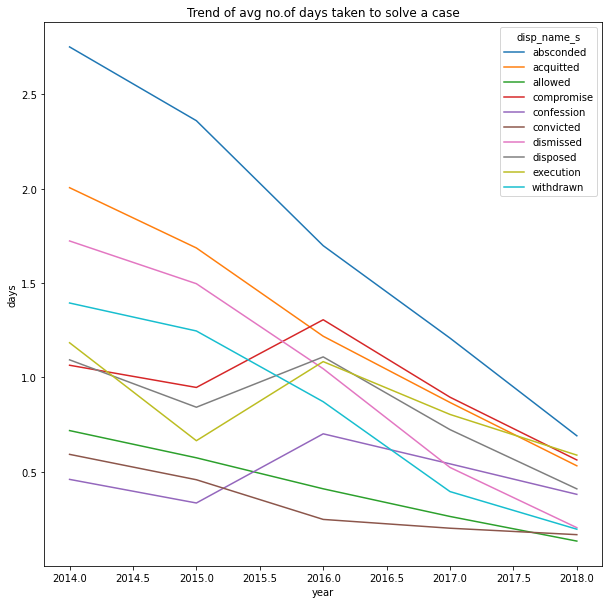

In [30]:
plot = avg_time.plot.line(title='Trend of avg no.of days taken to solve a case', figsize=(10,10), ylabel='days')
fig = plot.get_figure()
fig.savefig("/kaggle/working/avg_time_taken_to_solve_a_case.jpg")